# K-means clustering¶

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. 

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Density estimation and Unsupervized learning

$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

The basic idea in unsupervised learning is to find a compact representation of the data $\{\v{x}_1, \v{x}_2, ..., \v{x}_n\}$, whether these $\v{x}$ come from a class conditional probability distribution like those for males or females, or from all the samples. In other words, we are trying to *estimate a feature distribution* in one case or the other. This is, of course the fundamental problem of statistics, the estimation of probability distributions from data. 

We saw an example of this where we used the maximum likelihood method in logistic regression. There we were trying to estimate $P(y|\v{x}, \v{w})$, a 1-D distribution in y, by finding the most appropriate parameters $\v{w}$. Here we are trying to find some parametrization $\theta_y$ for $P(x|y, \theta_y)$ or $\v{\theta}$ in general for $P(x)$. 

But the basic method we will use remains the same: find the maximum likelihood, or, choose some probability distributions with parameters $\v{\theta}$, find the probability of each point of data if the data had come from this distribution, multiply these probabilities, and maximize the whole thing with respect to the parameters. (Equivalently we minimize the risk defined as the negative of the log-likelihood). 

Consider our heights and weights problem again. Suppose I did not tell you the labels: ie which samples were males and which samples were females. The data would then look like this:

In [3]:
df=pd.read_csv("01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


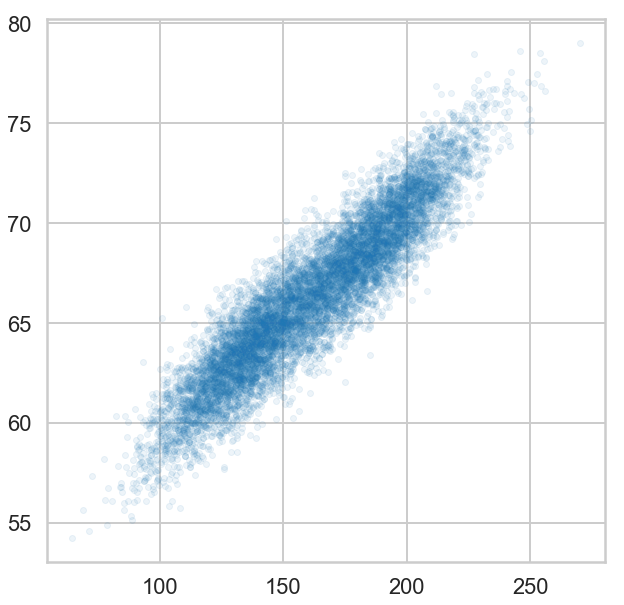

In [4]:
plt.figure(figsize=(10,10))
plt.plot(df.Weight, df.Height, '.', alpha=0.08);

The data looks vaguely elliptical and has two "clusters". Besides we know that heights and weights have normal distributions associated with them. So we decide to fit these features, with no knowledge of labels, with a mixture of two 2-D normal distributions. 

$$P(x) = \lambda G_0(\v{x},\theta_0) + (1 - \lambda) G_1(\v{x},\theta_1) $$

What we are doing is a probability distribution estimation on these height and weight features, by fitting for the parameters of whats known as a "mixture of gaussians". Note these are not the per label gaussians we fit before in LDA: rather, there are no labels any more, so this is just a mixture of gaussians. This is just a density estimation.

At this point, you may object, saying that we know from generative classifiers that we can find $P(x)$ as:

$$P(x) = \sum_y P(x|y, \theta_y) P(y).$$

You are right, if you knew the labels. But remember, I have taken these labels away from you, and thus there are no $y$'s, and this formula does not hold any more.

But your objection also makes sense: why not right the input density $P(x)$ as a sum of components, each of which is some other probability distribution. This is the notion of **clustering**: an attempt to find hidden structure in the data. So we can always write:

$$P(x) = \sum_z \lambda_z P(x|z, \theta_z),$$

where $z$ is some **hidden** variable which indexes the number of clusters in our problem. This is a variant of the idea behind the famous **kmeans** clustering algorithm, which we shall encounter in class.

So thats what we do below here, using two clusters based on our visual reconnoiter of the density in the graph above:

In [4]:
from sklearn.cluster import KMeans
X = df[['Height', 'Weight']]
kmeans = KMeans(n_clusters = 2, n_jobs = -1, random_state=0, max_iter = 300) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X)
# We look at 2 the clusters generated by k-means.
print(kmeans.cluster_centers_)

[[ 63.42053341 134.40734945]
 [ 69.36451555 188.93136595]]


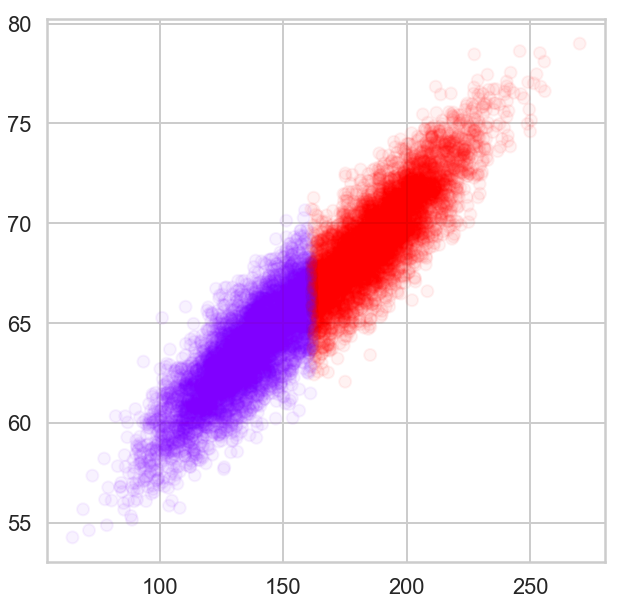

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(X.Weight,X.Height, c=kmeans.labels_, cmap='rainbow', alpha=0.05)  

In [6]:
# 3 clusters
kmeans = KMeans(n_clusters = 3, n_jobs = -1, random_state=0, max_iter = 300) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X)
# We look at 2 the clusters generated by k-means.
print(kmeans.cluster_centers_)

[[ 70.54130926 199.03765762]
 [ 62.50003403 126.13853578]
 [ 66.48757492 162.99925276]]


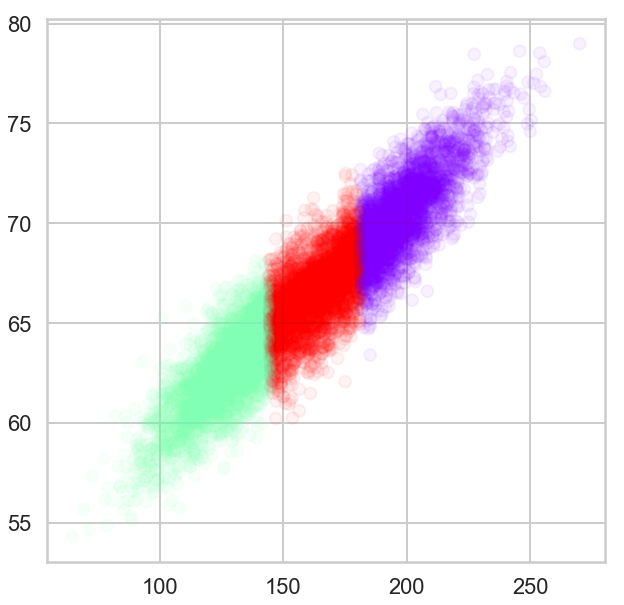

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(X.Weight,X.Height, c=kmeans.labels_, cmap='rainbow', alpha=0.05)

## Elbow method to select number of clusters¶

This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

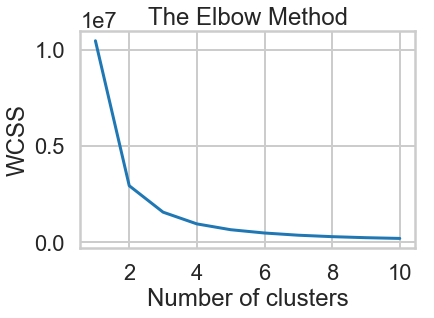

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()